In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
# Getting the data set
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
#handling missing value
#dropping column:'id'
mean=df['bmi'].mean()
df['bmi'].fillna(mean,inplace=True)
df['stroke']=df['stroke'].replace(1,'yes')
df['stroke']=df['stroke'].replace(0,'no')
df.isnull().sum()
del df['id']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 439.2+ KB


In [4]:
# Checking for missing values in the data set
print('Missing values: ',sum(df.isnull().sum()))
# 201 missing values is not very important since the entire data set has more than 4000 rows

Missing values:  0


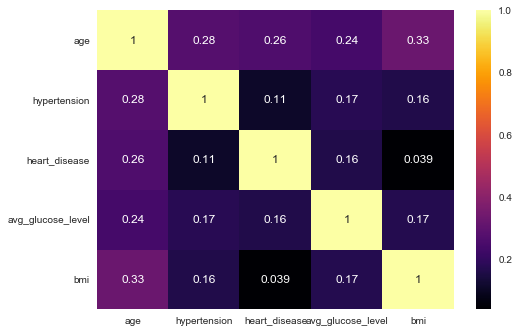

In [5]:
#correlation
sns.heatmap(df.corr(),annot=True,cmap="inferno")
plt.show()
#tolerance: 0.7, more than that, drop a column

In [6]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,yes
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,yes
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,yes
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,yes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,yes


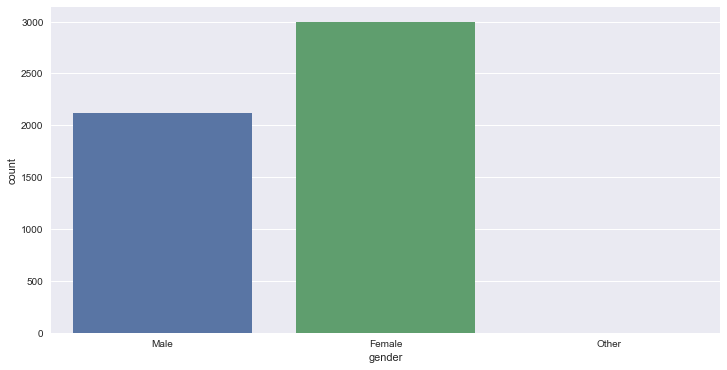

In [7]:
#count: gender
plt.figure(figsize=(12,6))
sns.countplot('gender',data=df)
plt.show()

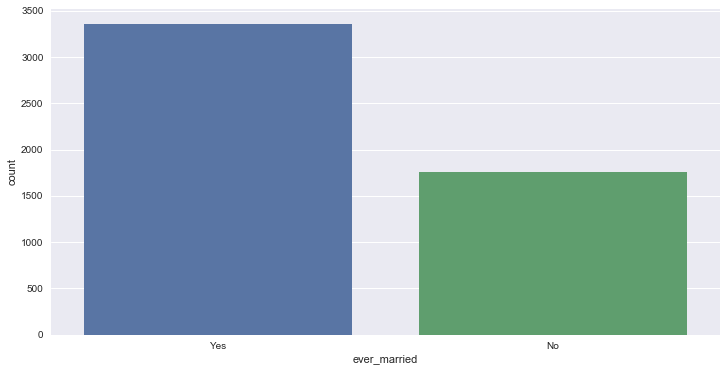

In [8]:
#count: marital status
plt.figure(figsize=(12,6))
sns.countplot('ever_married',data=df)
plt.show()

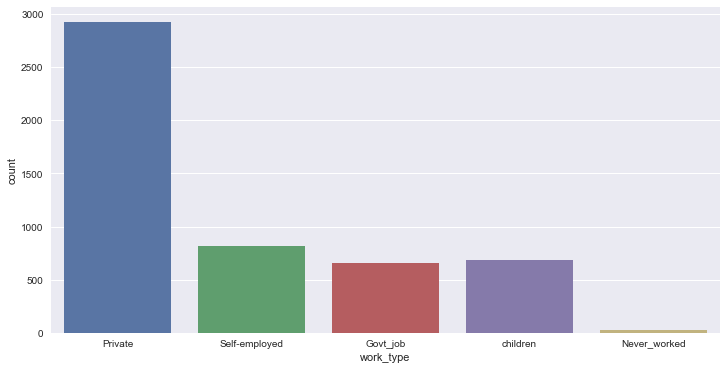

In [9]:
#count: work type
plt.figure(figsize=(12,6))
sns.countplot('work_type',data=df)
plt.show()

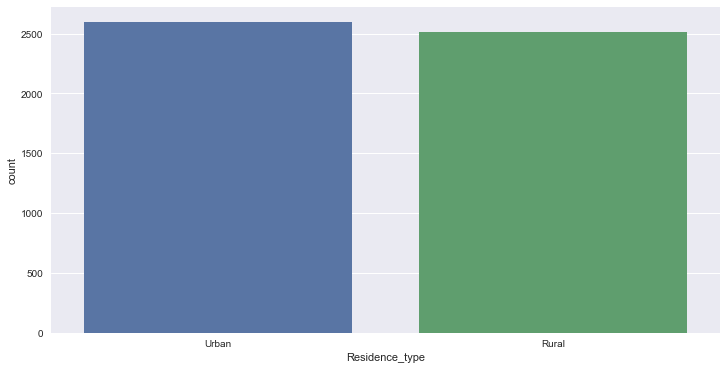

In [10]:
#count: residence type
plt.figure(figsize=(12,6))
sns.countplot('Residence_type',data=df)
plt.show()

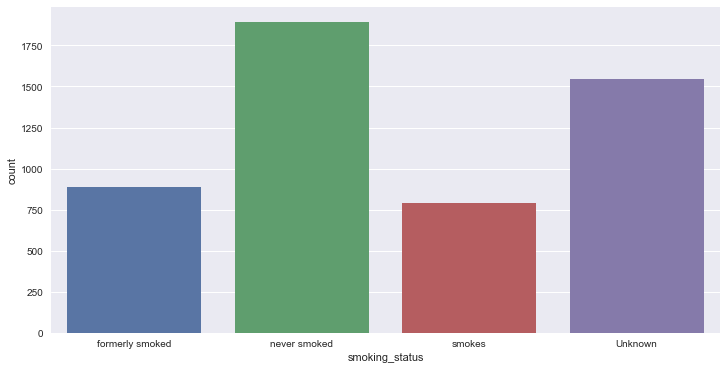

In [11]:
#count: smoking status
plt.figure(figsize=(12,6))
sns.countplot('smoking_status',data=df)
plt.show()

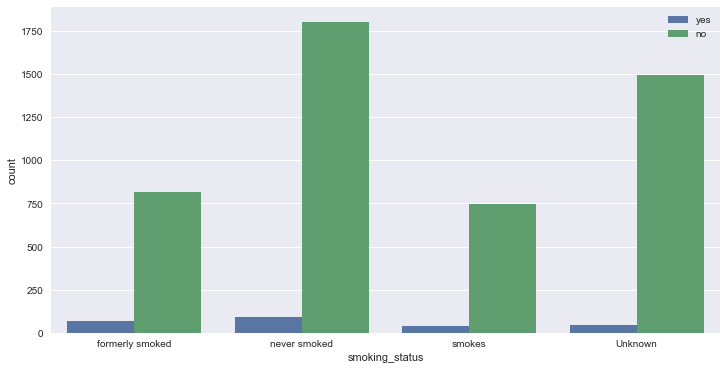

In [12]:
#stroke and smoking status relationship
plt.figure(figsize=(12,6))
sns.countplot('smoking_status',data=df,hue='stroke')
plt.legend(loc='best')
plt.show()

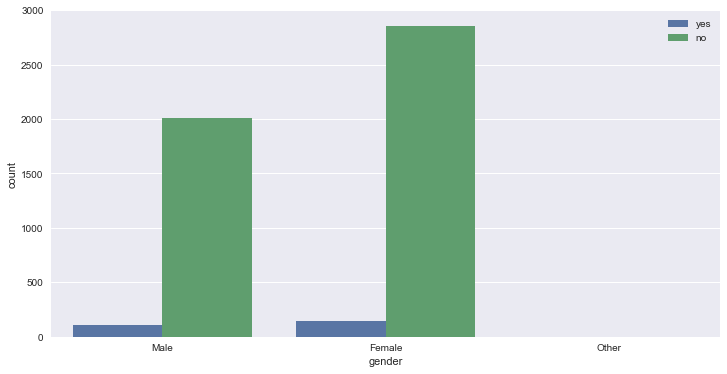

In [13]:
#stroke to gender relationship
plt.figure(figsize=(12,6))
sns.countplot('gender',data=df,hue='stroke')
plt.legend(loc='best')
plt.show()


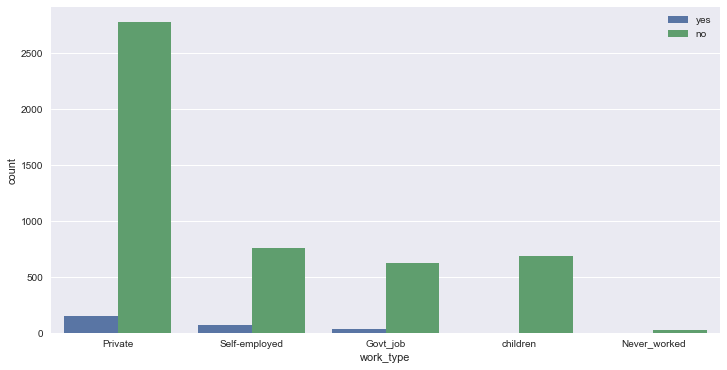

In [14]:
#stroke to work_type relationship
plt.figure(figsize=(12,6))
sns.countplot('work_type',data=df,hue='stroke')
plt.legend(loc='best')
plt.show()

In [15]:
# Transforming Yes/No collumns into 1s and 0s instead
encode = LabelEncoder()
df['ever_married']=encode.fit_transform(df['ever_married'])
df['Residence_type']=encode.fit_transform(df['Residence_type'])
df['gender']=encode.fit_transform(df['gender'])
work_type = pd.get_dummies(df["work_type"], drop_first=True)
df = pd.concat([df,work_type],axis=1)
df.drop(['work_type'], axis=1,inplace=True)


In [16]:
smoking_status = pd.get_dummies(df["smoking_status"], drop_first=True)
smoking_status.head()

,formerly smoked,never smoked,smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [17]:
df = pd.concat([df,smoking_status],axis=1)
df.drop(['smoking_status'], axis=1,inplace=True)
df['stroke']=df['stroke'].replace('yes',1)
df['stroke']=df['stroke'].replace('no',0)
df = df.rename(columns={'formerly smoked': 'formely_smoked', 'never smoked': 'never_smoked'})

In [18]:
# Setting the X and Y variables
x = df[['gender','age','hypertension','heart_disease','ever_married','Residence_type','avg_glucose_level','bmi','formely_smoked','never_smoked','smokes','Never_worked','Private','Self-employed','children']].values
y = df['stroke'].values

In [19]:
# Getting the X_train, X_test, Y_train and y_test variables for the modeling
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [20]:
#Importing all models that I will be listing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


In [27]:
#modeling Decision Tree
model_DecisionTree=DecisionTreeClassifier(max_depth=int(5),
                             random_state=11)
# modeling Extra Tree Classifier
model_ExtraTree= ExtraTreeClassifier(criterion='log_loss',random_state=123)
#modeling MLPClassifier
model_MLPC= MLPClassifier(max_iter=600, random_state=123)
# modeling Logistic Regression
model_LogisticRegression = LogisticRegression()
# modeling K-Nearst Neighbors 
model_KNN = KNeighborsClassifier(n_neighbors=4, algorithm='brute', metric='minkowski', p=2)
# GaussianNB(Naive Bayes)
model_GaussianNB = GaussianNB()
# BernoulliNB(Naive Bayes)
model_BernoulliNB= BernoulliNB(binarize=0.0)
# MultinominalNB(Naive Bayes)
model_MultinominalNB= MultinomialNB()
# modeling Random forest Classifier
model_RandomForest = RandomForestClassifier(max_depth=2, random_state=0)

In [28]:
model_DecisionTree.fit(x_train,y_train)
model_MLPC.fit(x_train,y_train)
model_LogisticRegression.fit(x_train, y_train)
model_KNN.fit(x_train, y_train)
model_GaussianNB.fit(x_train,y_train)
model_BernoulliNB.fit(x_train,y_train)
model_MultinominalNB.fit(x_train,y_train)
model_RandomForest.fit(x_train,y_train)
    
#predict
pred_test_DT = model_DecisionTree.predict(x_test)
pred_test_MLPC = model_MLPC.predict(x_test)
pred_test_LR = model_LogisticRegression.predict(x_test)
pred_test_KNN = model_KNN.predict(x_test)
pred_test_GuassianNB = model_GaussianNB.predict(x_test)
pred_test_BernoulliNB = model_BernoulliNB.predict(x_test)
pred_test_MultinominalNB = model_MultinominalNB.predict(x_test)
pred_test_RandomForest = model_RandomForest.predict(x_test)


In [29]:
# Classification Report for each model small overview of the diferences
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test_DT))
print(classification_report(y_test,pred_test_MLPC))
print(classification_report(y_test,pred_test_LR))
print(classification_report(y_test,pred_test_KNN))
print(classification_report(y_test,pred_test_GuassianNB))
print(classification_report(y_test,pred_test_BernoulliNB))
print(classification_report(y_test,pred_test_MultinominalNB))
print(classification_report(y_test,pred_test_RandomForest))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      1457
          1       0.00      0.00      0.00        76

avg / total       0.90      0.95      0.92      1533

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      1457
          1       0.25      0.03      0.05        76

avg / total       0.92      0.95      0.93      1533

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      1457
          1       0.00      0.00      0.00        76

avg / total       0.90      0.95      0.93      1533

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      1457
          1       0.00      0.00      0.00        76

avg / total       0.90      0.95      0.92      1533

             precision    recall  f1-score   support

          0       0.99      0.36      0.53      1457
          1       0.07      0.96 

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
# Getting all the training and test scores
train_score_DecisionTree= model_DecisionTree.score(x_train,y_train)
test_score_DecisionTree =model_DecisionTree.score(x_test,y_test)
train_score_MLPC= model_MLPC.score(x_train,y_train)
test_score_MLPC= model_MLPC.score(x_test,y_test)
train_score_LR= model_LogisticRegression.score(x_train, y_train)
test_score_LR= model_LogisticRegression.score(x_test,y_test)
train_score_KNN= model_KNN.score(x_train, y_train)
test_score_KNN= model_KNN.score(x_test,y_test)
train_score_GuassianNB= model_GaussianNB.score(x_train, y_train)
test_score_GuassianNB= model_GaussianNB.score(x_test,y_test)
train_score_BernoulliNB= model_BernoulliNB.score(x_train, y_train)
test_score_BernoulliNB= model_BernoulliNB.score(x_test,y_test)
train_score_MultinominalNB= model_MultinominalNB.score(x_train, y_train)
test_score_MultinominalNB= model_MultinominalNB.score(x_test,y_test)
train_score_RandomForest= model_RandomForest.score(x_train, y_train)
test_score_RandomForest= model_RandomForest.score(x_test,y_test)


In [31]:
# Test and Train accuracies:
print("Decision tree scores:")
print("training prediction accuracy: {:.3f}%".format(train_score_DecisionTree * 100))
print("test prediction accuracy: {:.3f}%".format(test_score_DecisionTree * 100))
print("MLP scores:")
print("training prediction accuracy: {:.3f}%".format(train_score_MLPC * 100))
print("test prediction accuracy: {:.3f}".format(test_score_MLPC* 100))
print("LR scores:")
print("training prediction accuracy: {:.3f}%".format(train_score_LR* 100))
print("test prediction accuracy: {:.3f}%".format(test_score_LR* 100))
print("KNN scores:")
print("training prediction accuracy: {:.3f}%".format(train_score_KNN* 100))
print("test prediction accuracy: {:.3f}%".format(test_score_KNN* 100))
print("GuassianNB scores:")
print("training prediction accuracy: {:.3f}%".format(train_score_GuassianNB* 100))
print("test prediction accuracy: {:.3f}%".format(test_score_GuassianNB* 100))
print("BernoulliNB scores:")
print("training prediction accuracy: {:.3f}%".format(train_score_BernoulliNB* 100))
print("test prediction accuracy: {:.3f}%".format(test_score_BernoulliNB* 100))
print("MultinominalNB scores:")
print("training prediction accuracy: {:.3f}%".format(train_score_MultinominalNB* 100))
print("test prediction accuracy: {:.3f}%".format(test_score_MultinominalNB* 100))
print("Random Forest scores:")
print("training prediction accuracy: {:.3f}%".format(train_score_RandomForest* 100))
print("test prediction accuracy: {:.3f}%".format(test_score_RandomForest* 100))

Decision tree scores:
training prediction accuracy: 95.443%
test prediction accuracy: 94.716%
MLP scores:
training prediction accuracy: 94.828%
test prediction accuracy: 94.781
LR scores:
training prediction accuracy: 95.192%
test prediction accuracy: 94.977%
KNN scores:
training prediction accuracy: 95.303%
test prediction accuracy: 94.651%
GuassianNB scores:
training prediction accuracy: 39.195%
test prediction accuracy: 38.943%
BernoulliNB scores:
training prediction accuracy: 94.800%
test prediction accuracy: 94.651%
MultinominalNB scores:
training prediction accuracy: 80.151%
test prediction accuracy: 80.365%
Random Forest scores:
training prediction accuracy: 95.164%
test prediction accuracy: 95.042%


In [32]:
# Inder to better compare all of the models I created the following dataframe
models_data= {'Machine_Learning_Algorithms':["DecisionTree","MLP Classifier","Logistic Regression","K-Neighors Network",
                           "Gaussian Naive Bayes","Bernoulli Naive Bayes","Multinominal Naive Bayes","Random Forest Classifier"],
             'Training_Scores':[train_score_DecisionTree,
                               train_score_MLPC,
                               train_score_LR,
                               train_score_KNN,
                               train_score_GuassianNB,
                               train_score_BernoulliNB,
                               train_score_MultinominalNB,
                               train_score_RandomForest],
             'Test_Scores':[test_score_DecisionTree
                           ,test_score_MLPC
                           ,test_score_LR
                           ,test_score_KNN
                           ,test_score_GuassianNB
                           ,test_score_BernoulliNB
                           ,test_score_MultinominalNB
                           ,test_score_RandomForest]}

models_dataset = pd.DataFrame(models_data)
models_dataset.set_index('Machine_Learning_Algorithms', inplace=True)
models_dataset['average_score'] = models_dataset.mean(axis=1)
models_dataset.sort_values(by=['average_score'], ascending=False)

,Test_Scores,Training_Scores,average_score
Machine_Learning_Algorithms,,,
Random Forest Classifier,0.950424,0.951635,0.951030
Logistic Regression,0.949772,0.951915,0.950843
DecisionTree,0.947162,0.954431,0.950797
K-Neighors Network,0.946510,0.953033,0.949772
MLP Classifier,0.947815,0.948281,0.948048
Bernoulli Naive Bayes,0.946510,0.948001,0.947256
Multinominal Naive Bayes,0.803653,0.801510,0.802581
Gaussian Naive Bayes,0.389432,0.391949,0.390691
